In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

In [3]:
#Read the files into python as dataframes
df1= pd.read_csv("C:/Users/laura/Desktop/ironhack/lab-customer-analysis-round-2/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [4]:
#Show the DataFrame's shape.
df1= pd.read_csv("C:/Users/laura/Desktop/ironhack/lab-customer-analysis-round-2/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")
print(df1.shape)

(10910, 26)


In [5]:
#Standardize header names.
df1.columns = df1.columns.str.lower().str.replace(" ", "_")

df1 = df1.rename(columns={'state':'st'})

In [6]:
#Which columns are numerical?
numerical_cols = df1.select_dtypes(include='number').columns

# Print the numerical column names
print(numerical_cols)

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')


In [7]:
#Which columns are categorical?
categorical_cols = df1.select_dtypes(include='object').columns

# Print the categorical column names
print(categorical_cols)

Index(['customer', 'st', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


In [8]:
#Check and deal with NaN values.
df1.isnull().sum()

unnamed:_0                          0
customer                            0
st                                631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   st                             10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [10]:
df1.isna().sum()

unnamed:_0                          0
customer                            0
st                                631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [11]:
#We see that we have with Nan values:st,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size, vehicle_type

In [12]:
#We are going to remove the Nan values from rows st and response
df1 = df1.dropna(subset=["st", "response"])
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [13]:
# Now, we are going to replacing Nans from numerical columns with the median: number_of_open_complaints
col_median = df1["months_since_last_claim"].dropna().median()
df1["months_since_last_claim"] = df1["months_since_last_claim"].fillna(col_median)


In [14]:
col_median = df1["number_of_open_complaints"].dropna().median()
df1["number_of_open_complaints"] = df1["number_of_open_complaints"].fillna(col_median)

In [15]:
# checking remaining Nans:
df1.isna().sum()

unnamed:_0                          0
customer                            0
st                                  0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     591
vehicle_size                      591
vehicle_type                     5164
dtype: int64

In [16]:
#Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [17]:
df1['date'] = pd.to_datetime(df1['effective_to_date'])

df1['month'] = df1['date'].dt.month.astype(str)

In [18]:
fill_df1 = pd.DataFrame({'effective_to_date': ['2022-01-15', '2022-02-20', '2022-03-25']})

fill_df1['effective_to_date'] = pd.to_datetime(fill_df1['effective_to_date'])

fill_df1['month'] = fill_df1['effective_to_date'].dt.month

print(fill_df1)

  effective_to_date  month
0        2022-01-15      1
1        2022-02-20      2
2        2022-03-25      3


In [19]:
#Show DataFrame info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10279 non-null  int64         
 1   customer                       10279 non-null  object        
 2   st                             10279 non-null  object        
 3   customer_lifetime_value        10279 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10279 non-null  object        
 6   education                      10279 non-null  object        
 7   effective_to_date              10279 non-null  object        
 8   employmentstatus               10279 non-null  object        
 9   gender                         10279 non-null  object        
 10  income                         10279 non-null  int64         
 11  location_code  

In [20]:
# Describe DataFrame.
df1.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000
mean,5473.485650,8029.229015,37541.332425,93.245063,15.064890,48.134157,0.361514,2.970912,435.736506
std,3149.220531,6917.287221,30350.225408,34.445333,9.772274,27.921951,0.888436,2.394379,292.321294
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2742.500000,4013.084627,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.788141
50%,5485.000000,5780.182197,33837.000000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,8205.500000,8992.381828,62100.500000,109.000000,23.000000,71.000000,0.000000,4.000000,548.327777
max,10908.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [21]:
# Import the library neccesary
import matplotlib.pyplot as plt

In [22]:
#Create a bar plot of the response counts
response_counts = df1['response'].value_counts()
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


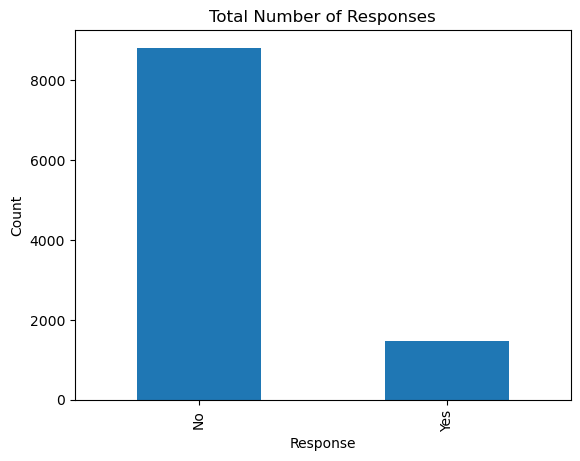

In [23]:
response_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Number of Responses')
plt.show()

In [24]:
#Import the seaborn library
import seaborn as sns

In [25]:
#convert the values yes in number 1 and no in number 0, so now i can convert in astype.(int)
df1['response'] = df1['response'].replace({'Yes': 1, 'No': 0})
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [26]:
response_rate = df1.groupby('sales_channel')['response'].mean().reset_index()

In [27]:
print(df1['sales_channel'].dtypes)

object


In [28]:
print(df1['response'].dtypes)

int64


In [29]:
df1['response'] = df1['response'].astype(int)

In [30]:
# I need to affirm the values 
print(df1['response'].unique())

[0 1]


In [31]:
#convert the values yes in number 1 and no in number 0, so now i can convert in astype.(int)
df1['response'] = df1['response'].replace({'Yes': 1, 'No': 0})
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [32]:
df1.drop(columns=['effective_to_date'], axis=1)
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [33]:
df1['response'] = df1['response'].astype(int)

In [34]:
mean_value = df1['response'].mean()
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [35]:
response_rate = df1.groupby('sales_channel')['response'].mean().reset_index()

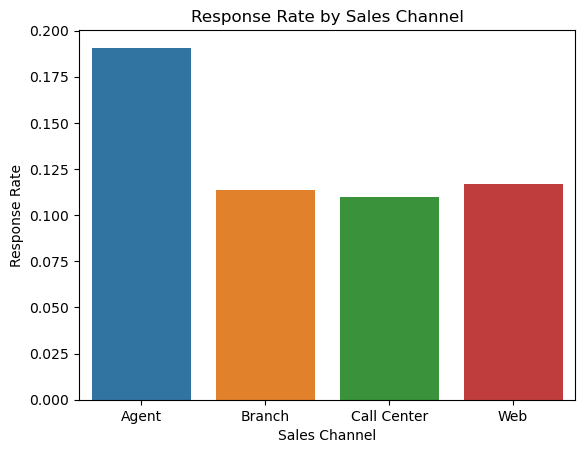

In [36]:
#Now , we can show a plot of the response rate by the sales channel.
sns.barplot(data=response_rate, x='sales_channel', y='response')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate by Sales Channel')
plt.show()

In [37]:
#Show a plot of the response rate by the total claim amount.
response_rate = df1.groupby('total_claim_amount')['response'].mean()

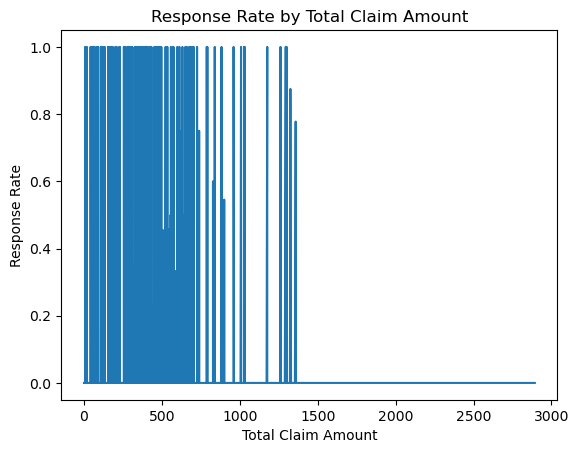

In [38]:
response_rate.plot(kind='line')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate by Total Claim Amount')
plt.show()

In [39]:
#Show a plot of the response rate by income.
response_rate = df1.groupby('income')['response'].mean()

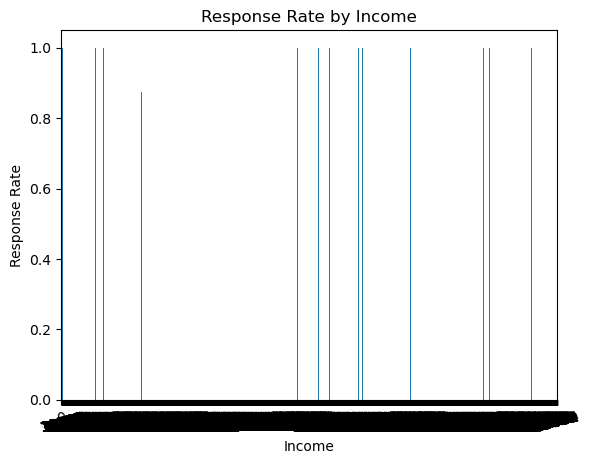

In [40]:
response_rate.plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate by Income')
plt.xticks(rotation=15)
plt.show()

In [41]:
import numpy as np

In [42]:
# Check the data types of the columns
data_types = df1.dtypes

In [43]:
numerical = df1.select_dtypes("number")
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [44]:
categorical = df1.select_dtypes("object")
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [45]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution
import matplotlib.pyplot as plt

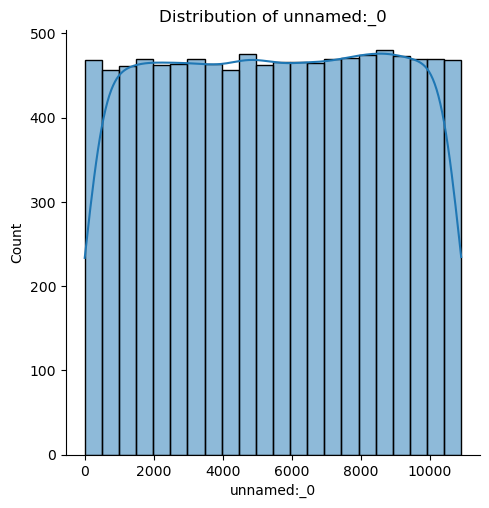

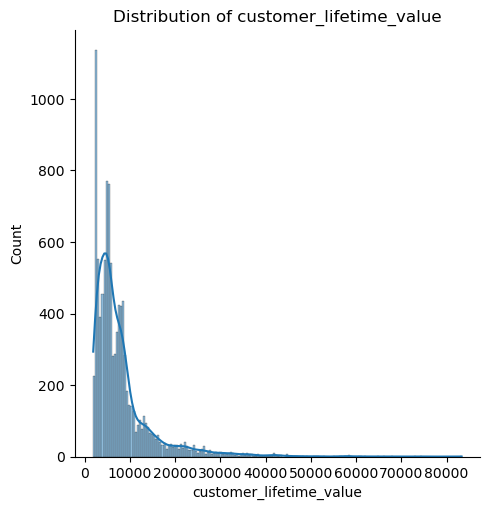

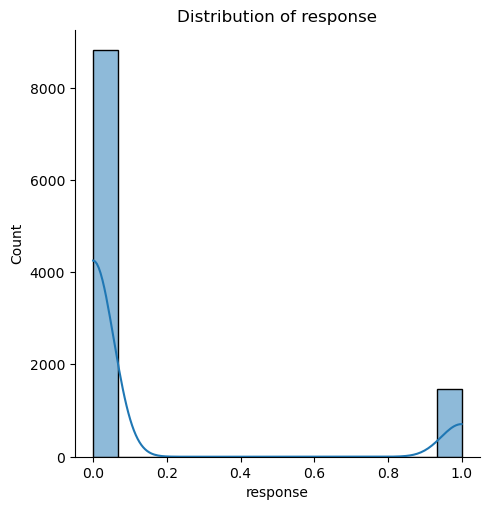

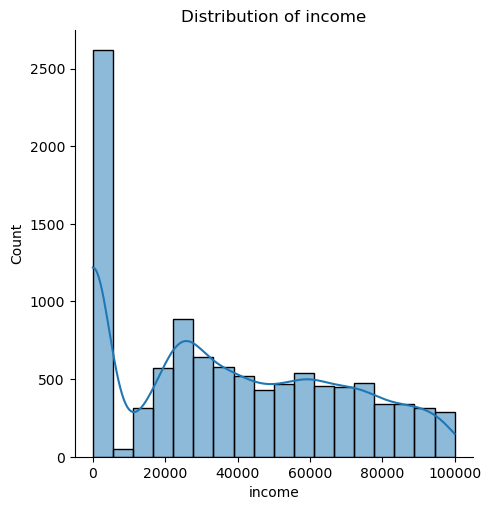

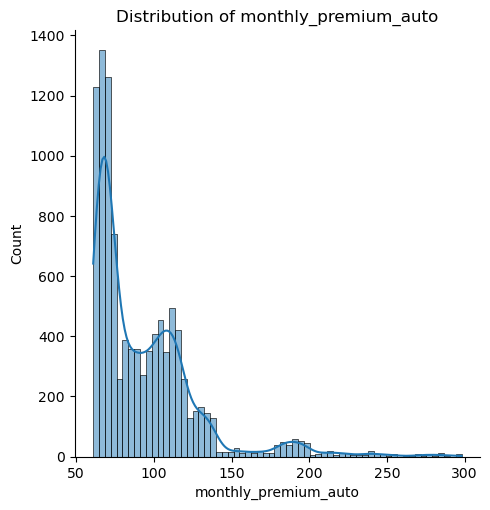

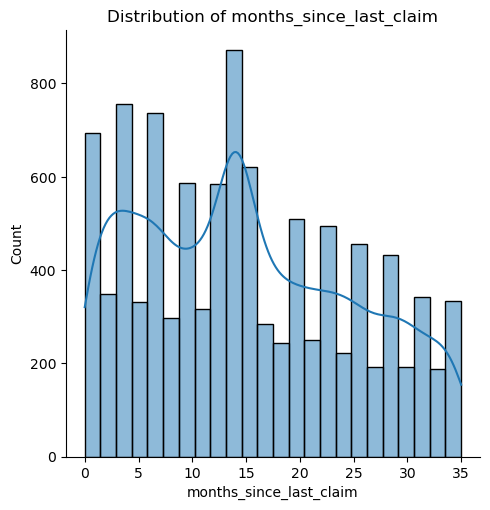

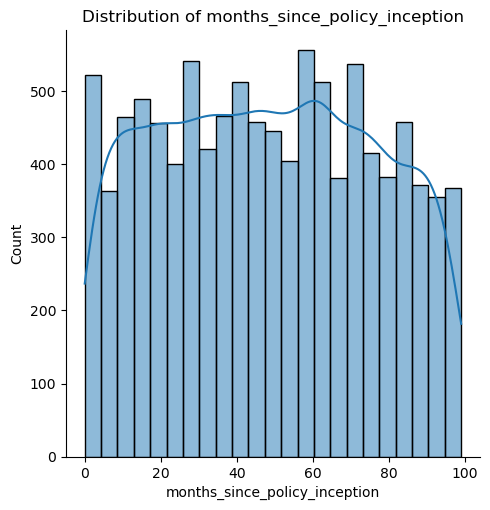

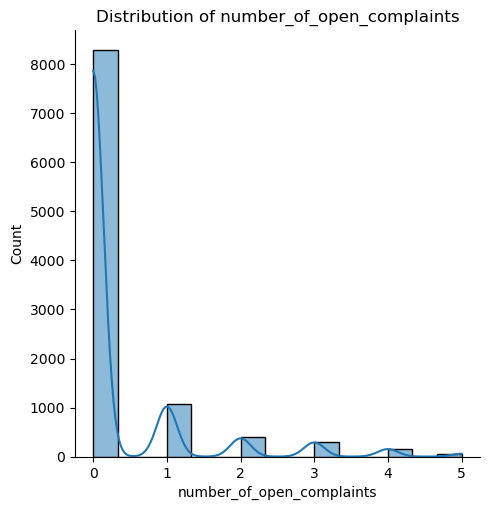

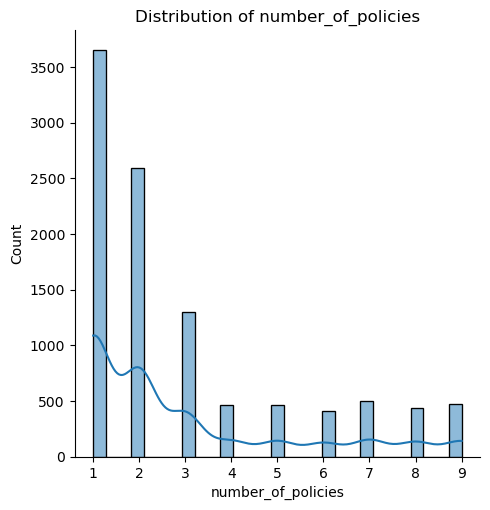

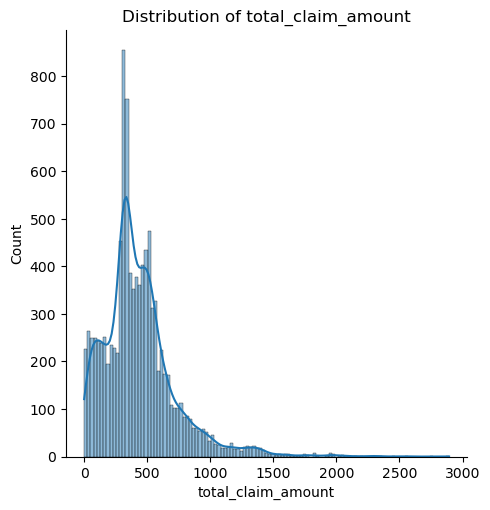

In [46]:
for col in numerical.columns:
    sns.displot(numerical[col], kde=True)  
    plt.title(f"Distribution of {col}")
    plt.show()

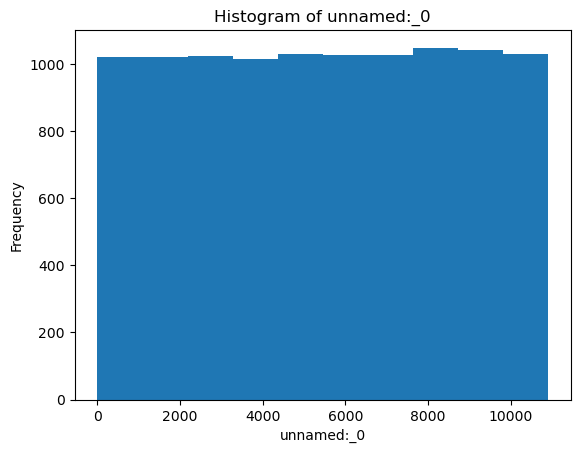

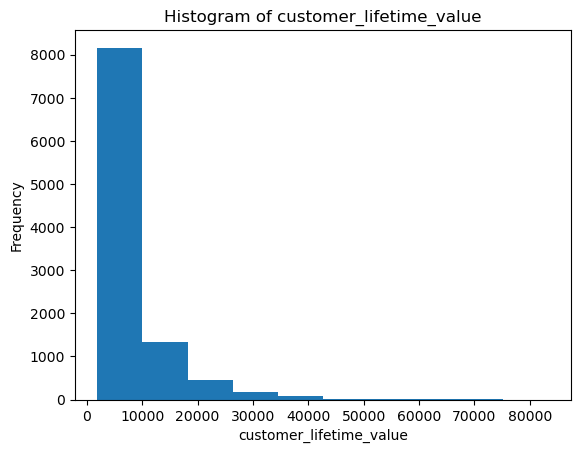

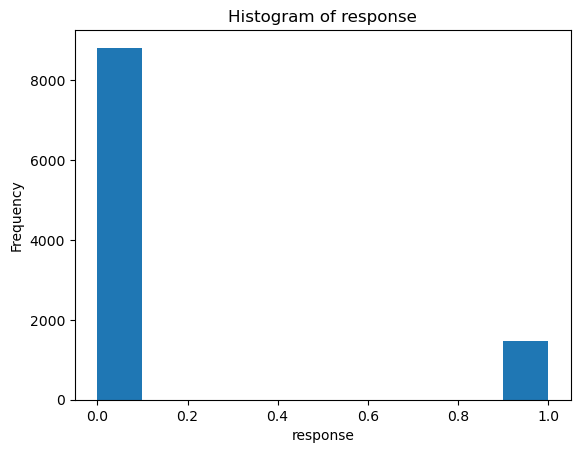

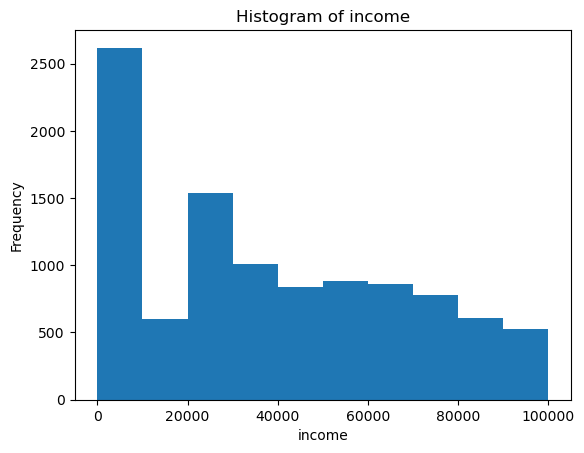

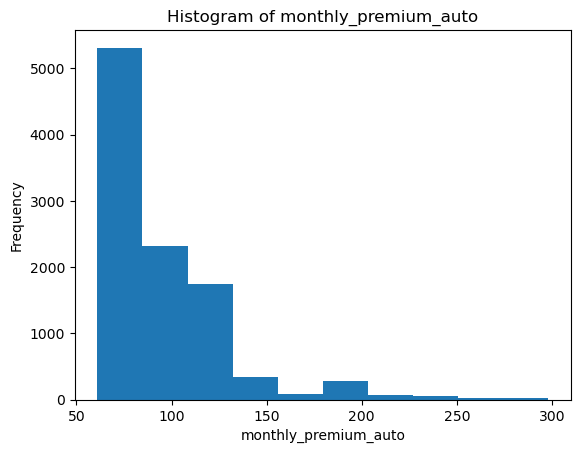

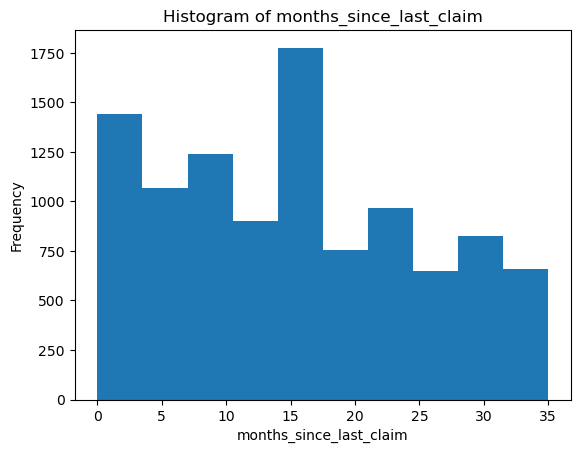

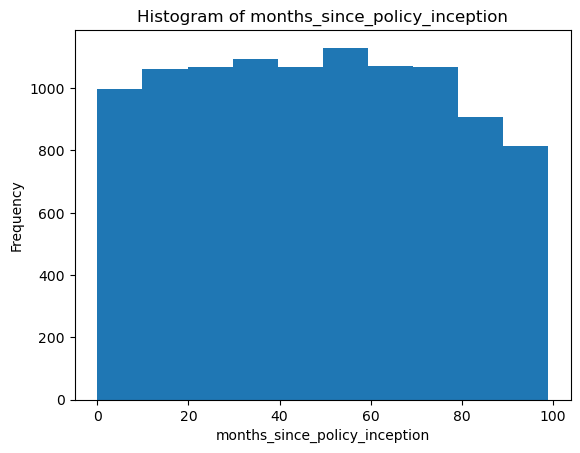

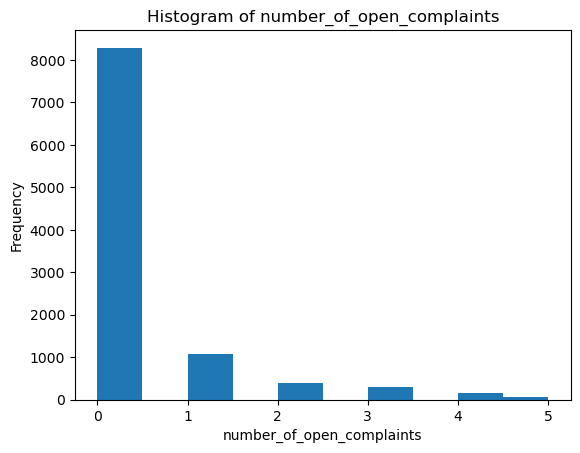

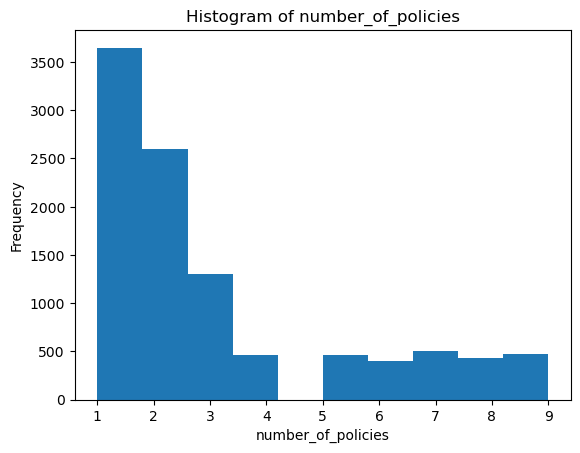

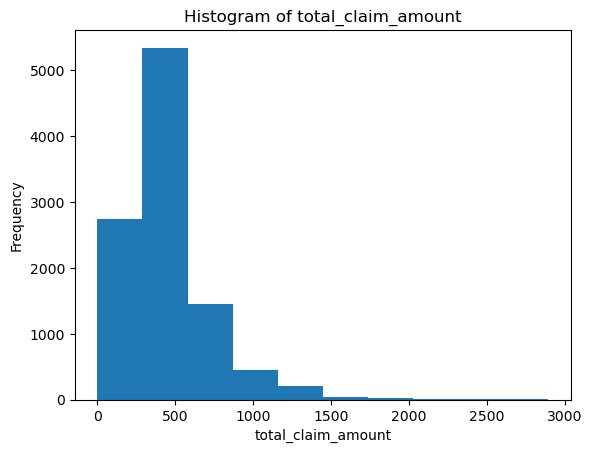

In [47]:
for col in numerical.columns:
    plt.hist(numerical[col], bins=10)  
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [48]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlation_matrix = numerical.corr()

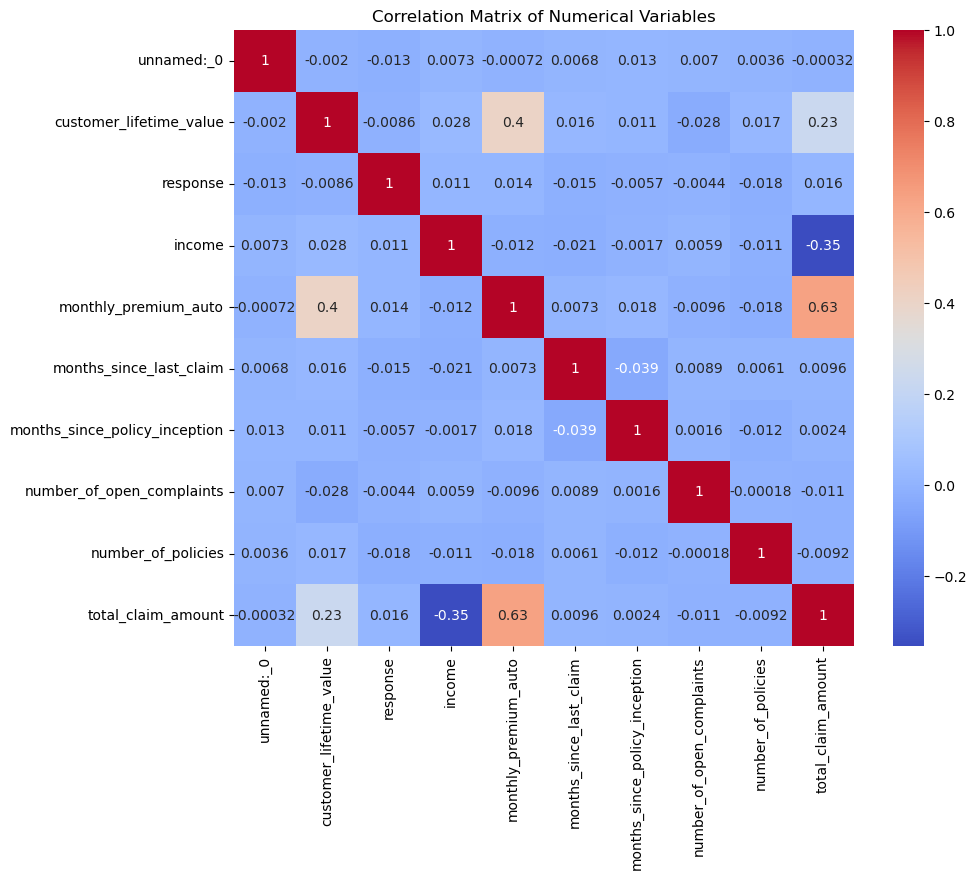

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

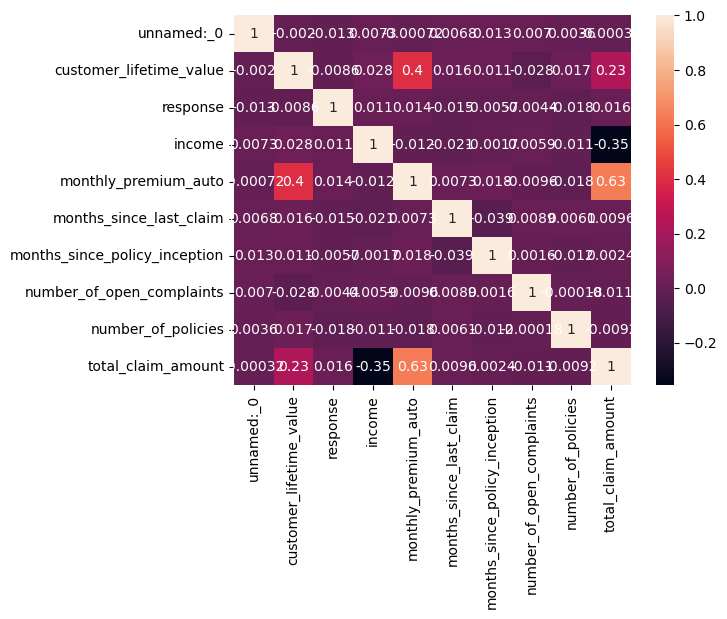

In [50]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Analyzing the graphs we consider that there is no high correlation in this case, therefore, I only print the heat map, since there is no correlation greater than 0.9

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
X = numerical.drop(['total_claim_amount', 'unnamed:_0'], axis=1)  
y = numerical['total_claim_amount'] 
numerical.info()
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10279 non-null  int64  
 1   customer_lifetime_value        10279 non-null  float64
 2   response                       10279 non-null  int32  
 3   income                         10279 non-null  int64  
 4   monthly_premium_auto           10279 non-null  int64  
 5   months_since_last_claim        10279 non-null  float64
 6   months_since_policy_inception  10279 non-null  int64  
 7   number_of_open_complaints      10279 non-null  float64
 8   number_of_policies             10279 non-null  int64  
 9   total_claim_amount             10279 non-null  float64
dtypes: float64(4), int32(1), int64(5)
memory usage: 843.2 KB


,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.216960,0,48029,61,7.0,52,0.0,9
1,2228.525238,0,0,64,3.0,26,0.0,1
2,14947.917300,0,22139,100,34.0,31,0.0,2
3,22332.439460,1,49078,97,10.0,3,0.0,2
4,9025.067525,0,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...,...
10904,19228.463620,0,0,187,14.0,32,0.0,2
10905,15563.369440,0,0,253,14.0,40,0.0,7
10906,5259.444853,0,61146,65,7.0,68,0.0,6
10907,23893.304100,0,39837,201,11.0,63,0.0,2


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler()

In [56]:
normalized_x_train = scaler.transform(X_train)

LAB 6

In [57]:
#Setting and fitting the encoder
encoder = OneHotEncoder(drop="first")

In [58]:
encoder.fit(categorical)

OneHotEncoder(drop='first')

In [59]:
matrix = encoder.transform(categorical).todense()
matrix

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
encoder.categories_[:]

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
        'ZZ97035'], dtype=object),
 array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
        '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
        '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
        '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
        '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
        '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
        '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
        '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
        '2/25/11', '2/26/11', '2/27/11', '2/28/11', '2/3/11', '2/4/11',


In [62]:
for i in numerical.columns:
    print(numerical[i].unique())

[    0     1     2 ... 10906 10907 10908]
[ 4809.21696   2228.525238 14947.9173   ...  5259.444853 23893.3041
 11971.97765 ]
[0 1]
[48029     0 22139 ... 61146 39837 64195]
[ 61  64 100  97 117  63 154  85 127  99  69 116 114  66  73  94 104 189
  74 121 110 111  72 115 159 101  65  82  71 126  68 199  96  67  62 125
 249 105  92  78  77  79 223 242  70 102 109 107 119 194 113 106 247  80
  86  81  83 122 253 196 132 139 130  93 112 222 118  88 182 283  90 128
  89 235 190  76  87 133 153 129  98 103 148 123  91 211 131  84 108 187
 214 181 173  95 124 137 145 188 143 198 138 245 195 186 170 136 161 157
 141 205 271 192 142 140 134 240 185 244 184 202 296 213 273 219 135 169
 155 225 266 215 197 256 212 158 180 166 168 183 210 162 191 179 150 146
 276 165 239 237 193 229 274 207 295 208 172 217 206 201 171 152 156 174
 238 167 151 144 163 287 209 290 228 220 232 178 177 275 176 281 149 298
 255 216 285 226 160 147 254 164 175 297 234 284 204 252 218 261 231 248
 286 230 268 203]
[ 7.  

In [63]:
columns = []
for i in range(len(encoder.categories_[:])):
    columns += list(encoder.categories_[i])[1:]
print(columns)

['AA11235', 'AA16582', 'AA30683', 'AA34092', 'AA35519', 'AA56476', 'AA69265', 'AA71604', 'AA93585', 'AB13432', 'AB21519', 'AB23825', 'AB26022', 'AB31813', 'AB45325', 'AB60627', 'AB62982', 'AB69140', 'AB72731', 'AB73565', 'AB78984', 'AB96670', 'AB98823', 'AC13887', 'AC22873', 'AC24378', 'AC40767', 'AC42963', 'AC58002', 'AC67315', 'AC73173', 'AC75391', 'AC79024', 'AD12500', 'AD18174', 'AD28349', 'AD28535', 'AD33653', 'AD33971', 'AD38685', 'AD56037', 'AD63766', 'AD71478', 'AD89594', 'AD95939', 'AE23906', 'AE30506', 'AE60813', 'AE62631', 'AE74442', 'AE89300', 'AE90216', 'AE93522', 'AE98193', 'AF10970', 'AF17671', 'AF20716', 'AF36894', 'AF37776', 'AF41118', 'AF47139', 'AF48816', 'AF49027', 'AF49625', 'AF69537', 'AF81450', 'AG22225', 'AG32304', 'AG39150', 'AG45299', 'AG47947', 'AG56998', 'AG58599', 'AG62087', 'AG62140', 'AG85127', 'AG85615', 'AH17051', 'AH22694', 'AH39293', 'AH41065', 'AH41449', 'AH53588', 'AH55475', 'AH58807', 'AH65907', 'AH84063', 'AH89786', 'AH92481', 'AH97088', 'AH99727'

In [64]:
cat_df = pd.DataFrame(matrix, columns=columns)
cat_df

,AA11235,AA16582,AA30683,AA34092,AA35519,AA56476,AA69265,AA71604,AA93585,AB13432,...,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,NaN,Medsize,Small,NaN,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [66]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = regressor.predict(X_test)
list(y_train)

[49.451117,
 371.206205,
 561.6,
 316.8,
 266.146673,
 312.0,
 345.6,
 677.970934,
 460.8,
 220.038588,
 340.201412,
 460.8,
 212.009825,
 419.365958,
 331.2,
 690.548602,
 340.8,
 787.993313,
 343.139611,
 681.167228,
 401.592109,
 772.798511,
 456.702735,
 331.2,
 475.2,
 672.0,
 273.879927,
 40.740297,
 409.985435,
 71.773341,
 480.0,
 238.262773,
 297.6,
 537.6,
 712.8,
 763.2,
 355.2,
 491.151197,
 62.625841,
 1027.000029,
 422.494292,
 307.2,
 525.6,
 739.2,
 476.486416,
 307.649586,
 326.4,
 103.424766,
 395.729716,
 460.8,
 291.587866,
 403.2,
 571.2,
 547.2,
 508.8,
 657.808231,
 345.022359,
 350.4,
 475.2,
 91.55098,
 189.869329,
 312.0,
 412.8,
 376.502488,
 669.6,
 36.975673,
 390.792553,
 18.192921,
 145.252168,
 331.2,
 765.591167,
 459.048775,
 157.440069,
 504.0,
 350.4,
 899.63718,
 921.6,
 134.629643,
 292.8,
 430.518791,
 1123.212014,
 523.688037,
 25.961213,
 1476.670903,
 600.0,
 408.0,
 1188.0,
 914.31553,
 900.0,
 321.6,
 1053.300143,
 354.199664,
 523.2,
 261.93

In [70]:
# Calculate R2
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("mse:", mse)
print("rmse:", rmse)
print("mae:", mae)
print("r2 score:", r2)

mse: 41677.74682877282
rmse: 204.15128417125575
mae: 145.53655177144407
r2 score: 0.5189177794055743
